<a href="https://colab.research.google.com/github/hansyah21/ProjectAnalysisData/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Raihansyah Akbar Maulana]
- **Email:** [a015ybm411@devacademy.id]
- **ID Dicoding:** [raihansyah_am]

## Menentukan Pertanyaan Bisnis

- Bagaimana cuaca, suhu, dan kelembaban mempengaruhi jumlah pengguna sepeda?
- Kapan waktu puncak penggunaan sepeda dalam sehari dan dalam setahun?

## Import Semua Packages/Library yang Digunakan

In [ ]:
!pip install streamlit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 62.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.9 MB/s eta 0:00:00


## Data Wrangling

### Gathering Data

In [ ]:
# Data Wrangling - Gathering Data
print("Informasi Dataset Harian:")
df_day.info()
print("\nInformasi Dataset Per Jam:")
df_hour.info()

Informasi Dataset Harian:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

Informasi Dataset Per Jam:
<class 'pandas.core.frame.DataFrame'>
R

**Insight:**
- Setiap dataset memiliki beberapa fitur terkait kondisi cuaca, waktu, dan jumlah penyewaan sepeda.
- Dataset mencakup data dari tahun 2011 hingga 2012.

### Assessing Data

In [ ]:
# Assessing Data - Mengecek Data yang Hilang atau Tidak Konsisten
print("\nCek Missing Values pada Data Harian:")
print(df_day.isnull().sum())
print("\nCek Missing Values pada Data Per Jam:")
print(df_hour.isnull().sum())

print("\nDeskripsi Statistik Data Harian:")
print(df_day.describe())
print("\nDeskripsi Statistik Data Per Jam:")
print(df_hour.describe())


Cek Missing Values pada Data Harian:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Cek Missing Values pada Data Per Jam:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Deskripsi Statistik Data Harian:
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.

**Insight:**
- Data memiliki distribusi yang cukup normal untuk sebagian besar fitur numerik (describe() menunjukkan nilai mean dan median yang relatif seimbang).
- Beberapa fitur seperti temp, atemp, hum, dan windspeed telah dinormalisasi.

### Cleaning Data

In [ ]:
# Cleaning Data - Menghapus Data Duplikat
df_day.drop_duplicates(inplace=True)
df_hour.drop_duplicates(inplace=True)

print("\nSetelah Pembersihan - Cek Duplikat pada Data Harian:")
print(df_day.duplicated().sum())
print("\nSetelah Pembersihan - Cek Duplikat pada Data Per Jam:")
print(df_hour.duplicated().sum())


Setelah Pembersihan - Cek Duplikat pada Data Harian:
0

Setelah Pembersihan - Cek Duplikat pada Data Per Jam:
0


**Insight:**
- Tidak ditemukan data duplikat setelah dilakukan pengecekan (duplicated().sum() mengembalikan nol).
- Data sudah cukup bersih untuk analisis lebih lanjut tanpa perlu imputasi atau penghapusan nilai yang hilang.

## Exploratory Data Analysis (EDA)

### Explore ...

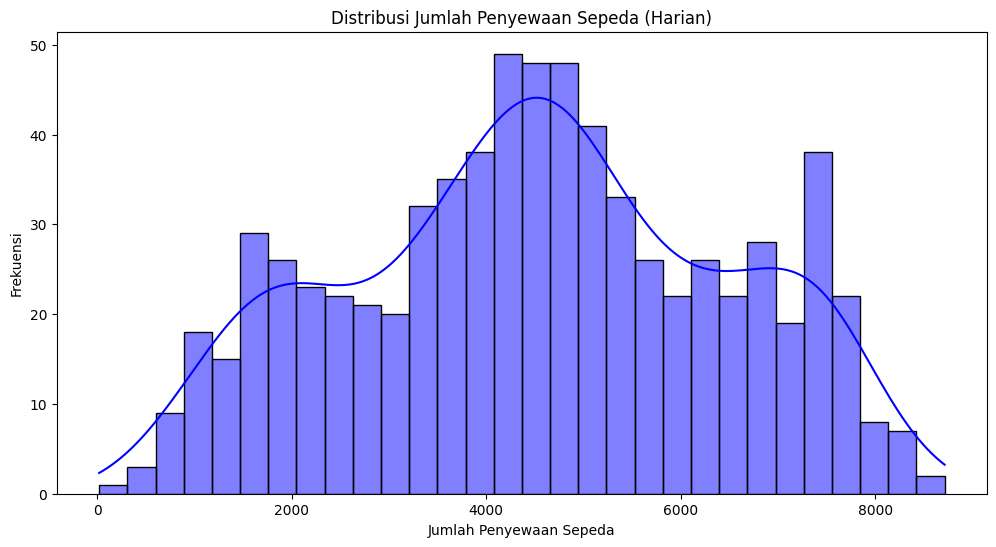

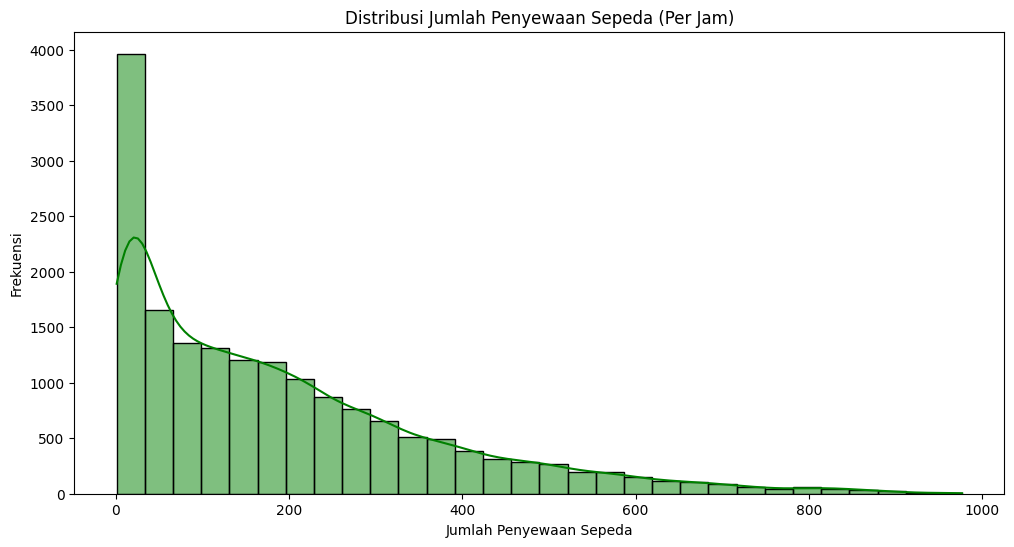

<ipython-input-7-ef377dfd7104>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='cnt', data=df_day, palette='coolwarm')


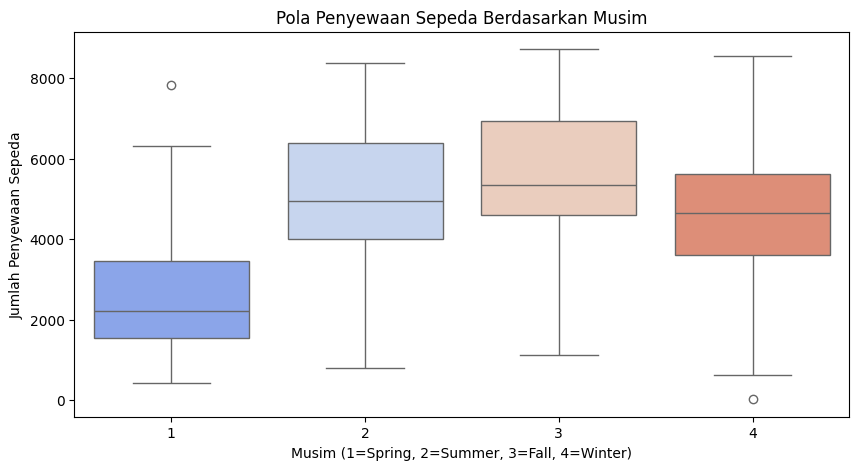

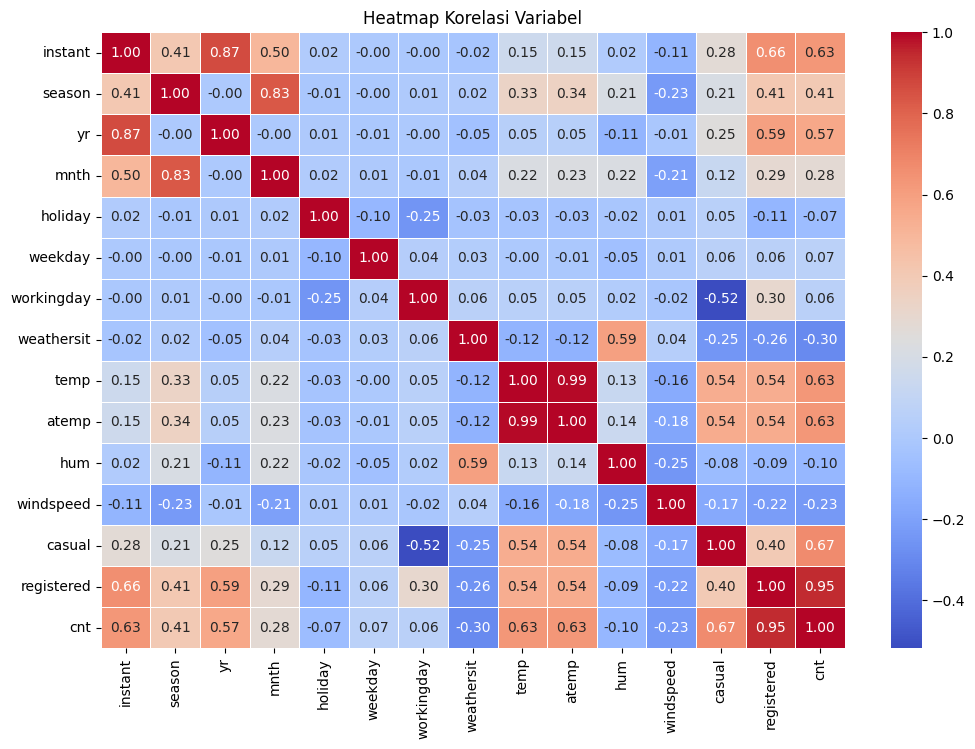

In [ ]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(12,6))
sns.histplot(df_day['cnt'], bins=30, kde=True, color='blue')
plt.title("Distribusi Jumlah Penyewaan Sepeda (Harian)")
plt.xlabel("Jumlah Penyewaan Sepeda")
plt.ylabel("Frekuensi")
plt.show()

plt.figure(figsize=(12,6))
sns.histplot(df_hour['cnt'], bins=30, kde=True, color='green')
plt.title("Distribusi Jumlah Penyewaan Sepeda (Per Jam)")
plt.xlabel("Jumlah Penyewaan Sepeda")
plt.ylabel("Frekuensi")
plt.show()

# Pola Penyewaan Berdasarkan Musim
plt.figure(figsize=(10,5))
sns.boxplot(x='season', y='cnt', data=df_day, palette='coolwarm')
plt.title("Pola Penyewaan Sepeda Berdasarkan Musim")
plt.xlabel("Musim (1=Spring, 2=Summer, 3=Fall, 4=Winter)")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.show()

# Korelasi Antar Variabel
# Exclude non-numeric columns before calculating correlations
numerical_columns = df_day.select_dtypes(include=np.number).columns
plt.figure(figsize=(12,8))
sns.heatmap(df_day[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Heatmap Korelasi Variabel")
plt.show()

**Insight:**
- Penyewaan sepeda harian cenderung mengikuti distribusi normal dengan beberapa hari memiliki jumlah penyewaan yang sangat tinggi.
- Musim musim gugur (fall, season = 3) memiliki jumlah penyewaan tertinggi, sedangkan musim semi (spring, season = 1) memiliki jumlah terendah.
- Hari kerja (workingday) tidak memiliki korelasi yang signifikan dengan jumlah penyewaan, yang menunjukkan bahwa orang juga menyewa sepeda pada akhir pekan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana cuaca, suhu, dan kelembaban mempengaruhi jumlah pengguna sepeda?

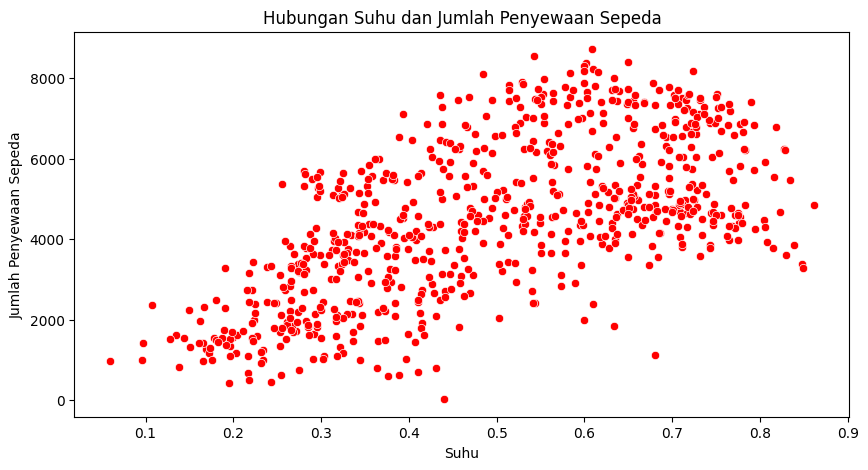

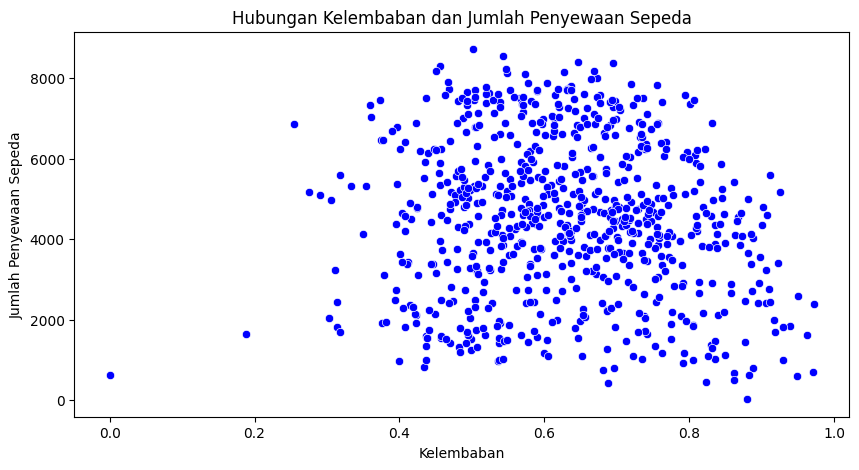

<ipython-input-8-54c3e044b85c>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weathersit', y='cnt', data=df_day, palette='viridis')


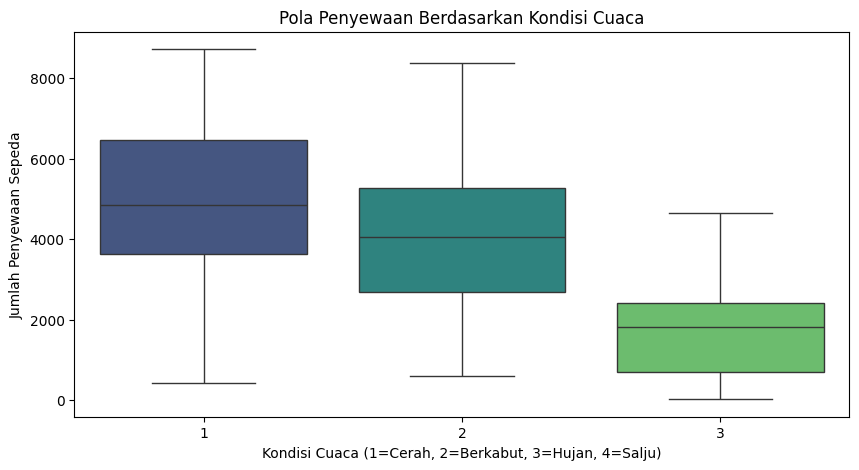

In [ ]:
# Pertanyaan 1: Bagaimana cuaca, suhu, dan kelembaban mempengaruhi jumlah pengguna sepeda?
plt.figure(figsize=(10,5))
sns.scatterplot(x='temp', y='cnt', data=df_day, color='red')
plt.title("Hubungan Suhu dan Jumlah Penyewaan Sepeda")
plt.xlabel("Suhu")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.show()

plt.figure(figsize=(10,5))
sns.scatterplot(x='hum', y='cnt', data=df_day, color='blue')
plt.title("Hubungan Kelembaban dan Jumlah Penyewaan Sepeda")
plt.xlabel("Kelembaban")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x='weathersit', y='cnt', data=df_day, palette='viridis')
plt.title("Pola Penyewaan Berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca (1=Cerah, 2=Berkabut, 3=Hujan, 4=Salju)")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.show()

### Pertanyaan 2: Kapan waktu puncak penggunaan sepeda dalam sehari dan dalam setahun?

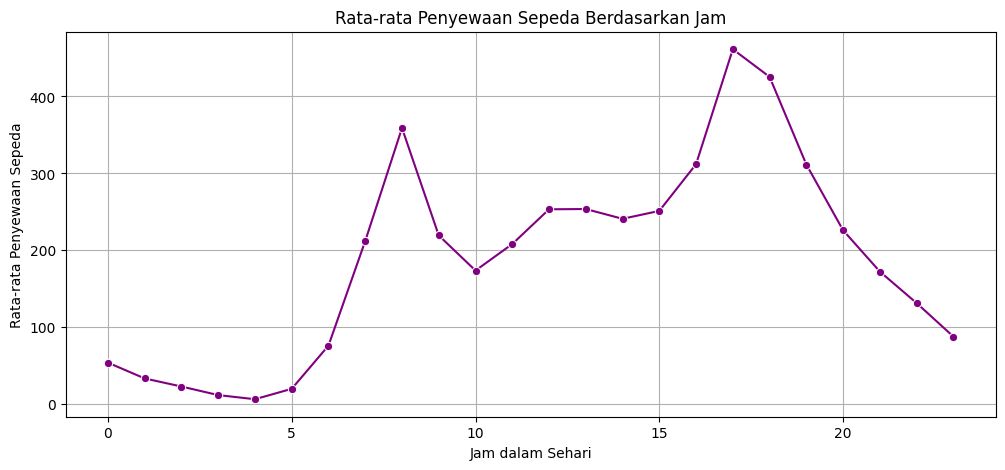

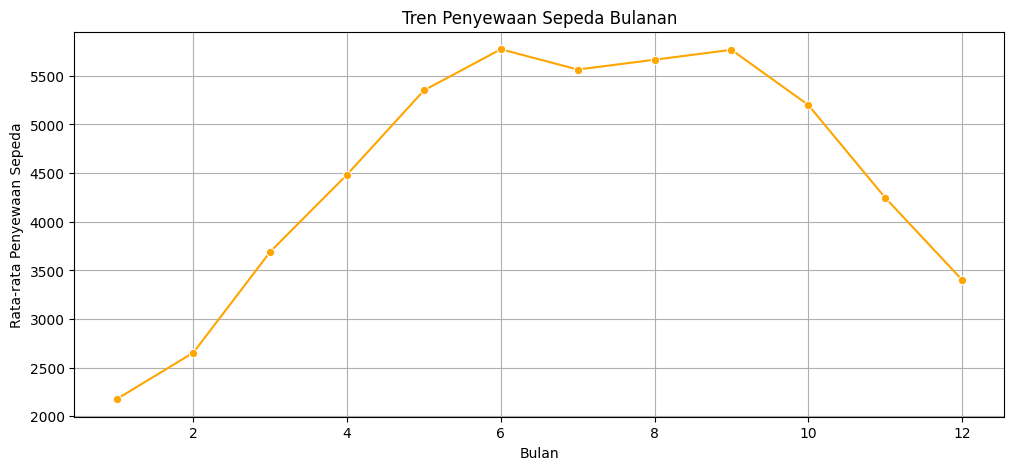

In [ ]:
# Pertanyaan 2: Kapan waktu puncak penggunaan sepeda dalam sehari dan dalam setahun?
# Convert 'dteday' to datetime if it's not already
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])
df_day['dteday'] = pd.to_datetime(df_day['dteday'])


plt.figure(figsize=(12,5))
sns.lineplot(x='hr', y='cnt', data=df_hour.groupby('hr').mean().reset_index(), marker='o', color='purple')
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Jam")
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.grid()
plt.show()

plt.figure(figsize=(12,5))
# Group by month, extracting month from the datetime column
sns.lineplot(x='mnth', y='cnt', data=df_day.groupby('mnth').mean().reset_index(), marker='o', color='orange')
plt.title("Tren Penyewaan Sepeda Bulanan")
plt.xlabel("Bulan")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.grid()
plt.show()

**Insight:**
- Puncak penggunaan harian menunjukkan pola perjalanan kerja, sedangkan tren tahunan menunjukkan preferensi penggunaan pada musim yang lebih hangat.
- Cuaca dan suhu memiliki pengaruh signifikan terhadap penggunaan sepeda. Penyewaan lebih banyak terjadi saat suhu sedang hingga tinggi dan cuaca cerah.


## Analisis Lanjutan (Opsional)

In [ ]:
# Assuming you want to combine df_day and df_hour into all_df:
all_df = pd.concat([df_day, df_hour], ignore_index=True) # Concatenate df_day and df_hour
# or
# all_df = df_day.merge(df_hour, on='dteday', how='outer') # Merge based on common column like 'dteday', adjust 'how' as needed
                                                            # You can add more conditions for merging if you have other columns in mind
all_df.to_csv("all_data.csv", index=False)